In [1]:
import os
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
def get_avg_std(metric_list, percent=100, std_flag=False):
    mean_val = np.mean(metric_list)
    std_val = np.std(metric_list)
    if std_flag:
        return f"{mean_val*percent:.2f}±{std_val:.2f}"
    else:
        return np.round(mean_val*percent, 2)


def summarize_results(json_folder, std_flag=False):
    metrics_ls, metrics_ls_multi_hop = [], []

    for filename in sorted(os.listdir(json_folder)):
        if filename.endswith('.json') and 'multi_turn' not in filename:
            filepath = os.path.join(json_folder, filename)
            # print(filepath)
            with open(filepath, 'r') as file:
                metrics = json.load(file)
                parts = filename.split('_')
                domain = parts[0]
                topic = ' '.join(parts[1:-1])  
                edit_method = parts[-1].replace('.json', '')  

                results = {
                    "domain": domain,
                    "topic": topic,
                    "edit_method": edit_method,
                    # "model": model,
                    "efficacy_pre": get_avg_std([e['pre']['edit_acc'][0] for e in metrics]),
                    "efficacy_post": get_avg_std([e['post']['edit_acc'][0] for e in metrics]),
                    "rephrase_pre": get_avg_std([e['pre']['rephrase_acc'][0] for e in metrics]),
                    "rephrase_post": get_avg_std([e['post']['rephrase_acc'][0] for e in metrics]),
                    "yes_pre": get_avg_std([e['pre']['yes_questions']['yes_acc'][0] for e in metrics]),
                    "yes_post": get_avg_std([e['post']['yes_questions']['yes_acc'][0] for e in metrics]),
                    "no_pre": get_avg_std([e['pre']['no_questions']['no_acc'][0] for e in metrics]),
                    "no_post": get_avg_std([e['post']['no_questions']['no_acc'][0] for e in metrics]),
                    "mc_pre": get_avg_std([e['pre']['multiple_choice_questions']['multiple_choice_acc'][0] for e in metrics]),
                    "mc_post": get_avg_std([e['post']['multiple_choice_questions']['multiple_choice_acc'][0] for e in metrics]),
                    "reversed_pre": get_avg_std([e['pre']['reversed_relation_questions']['reversed_relation_acc'][0] for e in metrics]),
                    "reversed_post": get_avg_std([e['post']['reversed_relation_questions']['reversed_relation_acc'][0] for e in metrics]),
                    "locality_post": get_avg_std([e['post']['locality'][f'locality_acc'][0] for e in metrics]),
                }

                results_multi_hop = {
                    "domain": domain,
                    "topic": topic,
                    "edit_method": edit_method,
                    # "model": model,
                    "questions_2hop_pre": get_avg_std([e['pre']['questions_2hop']['2hop_acc'][0] for e in metrics]),
                    "questions_2hop_post": get_avg_std([e['post']['questions_2hop']['2hop_acc'][0] for e in metrics]),
                    "questions_3hop_pre": get_avg_std([e['pre']['questions_3hop']['3hop_acc'][0] for e in metrics]),
                    "questions_3hop_post": get_avg_std([e['post']['questions_3hop']['3hop_acc'][0] for e in metrics]),
                    "questions_4hop_pre": get_avg_std([e['pre']['questions_4hop']['4hop_acc'][0] for e in metrics]),
                    "questions_4hop_post": get_avg_std([e['post']['questions_4hop']['4hop_acc'][0] for e in metrics]),
                    "questions_5hop_pre": get_avg_std([e['pre']['questions_5hop']['5hop_acc'][0] for e in metrics]),
                    "questions_5hop_post": get_avg_std([e['post']['questions_5hop']['5hop_acc'][0] for e in metrics]),
                    "questions_6hop_pre": get_avg_std([e['pre']['questions_6hop']['6hop_acc'][0] for e in metrics]),
                    "questions_6hop_post": get_avg_std([e['post']['questions_6hop']['6hop_acc'][0] for e in metrics]),
                }
                metrics_ls.append(results)
                metrics_ls_multi_hop.append(results_multi_hop)
    df = pd.DataFrame(metrics_ls)
    df_multi_hop = pd.DataFrame(metrics_ls_multi_hop)
    # df['edit_method'] = pd.Categorical(df['edit_method'], ["ROME", "FT-M", "ICL"])
    # df['Gene_increase'] = df.apply(lambda x: x['Generalization_post'] - x['Generalization_pre'], axis=1)
    # df['Port_increase'] = df.apply(lambda x: x['Portability_post'] - x['Portability_pre'], axis=1)
    # return df[['edit_method', 'model', 'Reliability_pre', 'Reliability_post', 'Reli_increase', 'Generalization_pre', 
    #            'Generalization_post', 'Gene_increase', 'Portability_pre', 'Portability_post', 'Port_increase']]
    return df, df_multi_hop

In [36]:
json_folder = "../results/meta_llama_3_8b_instruct"
for filename in sorted(os.listdir(json_folder)):
    if filename.endswith('.json') and 'multi_turn' not in filename:
        parts = filename.split('_')
        topic = ' '.join(parts[:-1])  
        edit_method = parts[-1].replace('.json', '')  
        print(f'topic: {topic:<25} edit_method: {edit_method}')

topic: business brand            edit_method: FT-L
topic: business brand            edit_method: FT-M
topic: business brand            edit_method: GRACE
topic: business brand            edit_method: ICL
topic: business brand            edit_method: LoRA
topic: business brand            edit_method: MEMIT
topic: business brand            edit_method: ROME
topic: business corporation      edit_method: FT-L
topic: business corporation      edit_method: FT-M
topic: business corporation      edit_method: GRACE
topic: business corporation      edit_method: ICL
topic: business corporation      edit_method: LoRA
topic: business corporation      edit_method: MEMIT
topic: business corporation      edit_method: ROME
topic: business industry         edit_method: FT-L
topic: business industry         edit_method: FT-M
topic: business industry         edit_method: GRACE
topic: business industry         edit_method: ICL
topic: business industry         edit_method: LoRA
topic: business industry     

## Multi-turn

In [ ]:
with open('../tmp/tmp2_places_country_ROME_meta_llama_3.1_8b_instruct_results.json', 'r') as file:
    metrics = json.load(file)
metrics[0]

{'pre': {'edit_acc': 0,
  'edit_output': 'Bechuanaland',
  'edit_acc_multi_turn': [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
  'edit_output_multi_turn': ['Bechuanaland',
   'Yes',
   'Yes',
   'Yes',
   'Yes',
   'Yes',
   'Yes',
   'Yes',
   'Yes',
   'Yes',
   'Yes'],
  'locality': {'locality_output': ['Gaborone']},
  'portability': {},
  'yes_questions': {'yes_acc': [1], 'yes_output': ['Yes']},
  'no_questions': {'no_acc': [0], 'no_output': ['Yes']},
  'multiple_choice_questions': {'multiple_choice_acc': [0],
   'multiple_choice_output': ['Bechuanaland']},
  'reversed_relation_questions': {'reversed_relation_acc': [0],
   'reversed_relation_output': ['Ireland']},
  'questions_2hop': {'2hop_acc': [1], '2hop_output': ['South Africa']},
  'questions_3hop': {'3hop_acc': [0], '3hop_output': ['South Africa']},
  'questions_4hop': {'4hop_acc': [0], '4hop_output': ['English']},
  'questions_5hop': {'5hop_acc': [0], '5hop_output': ['South Africa']},
  'questions_6hop': {'6hop_acc': [1], '6hop_output

In [2]:
import matplotlib.pyplot as plt

def plot_multi_turn(metrics):
    multi_turn_ls_pre, multi_turn_ls_post = [], []
    for e in metrics:
        multi_turn_ls_pre.append(e['pre']['edit_acc_multi_turn'])
        multi_turn_ls_post.append(e['post']['edit_acc_multi_turn'])
    multi_turn_ls_avg_pre = np.mean(multi_turn_ls_pre, axis=0)[1:]
    multi_turn_ls_avg_post = np.mean(multi_turn_ls_post, axis=0)[1:]

    # plt.figure(figsize=(10, 6))
    plt.plot(multi_turn_ls_avg_pre, label='Pre-edit')
    plt.plot(multi_turn_ls_avg_post, label='Post-edit')
    plt.xlabel('Turn')
    plt.ylabel('Edit Accuracy')
    plt.legend()
    plt.show()

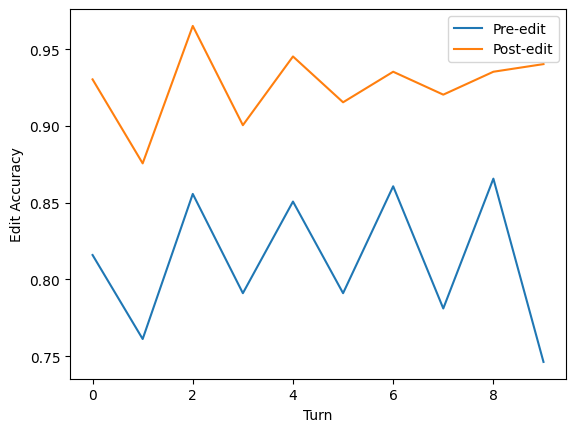

In [20]:
with open('../tmp/multi_turn_1_places_country_ROME_meta_llama_3.1_8b_instruct.json', 'r') as file:
    metrics = json.load(file)
plot_multi_turn(metrics)

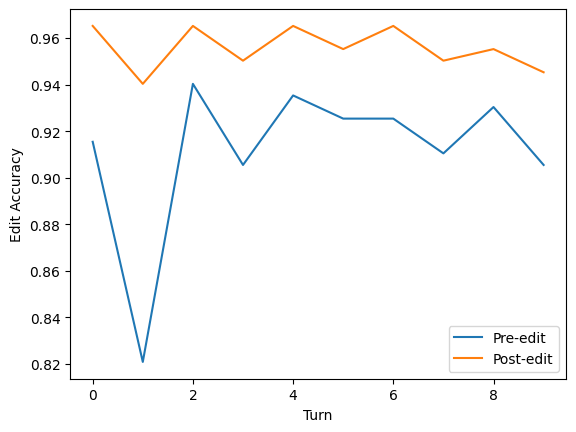

In [21]:
with open('../tmp/multi_turn_2_places_country_ROME_meta_llama_3.1_8b_instruct.json', 'r') as file:
    metrics = json.load(file)
plot_multi_turn(metrics)

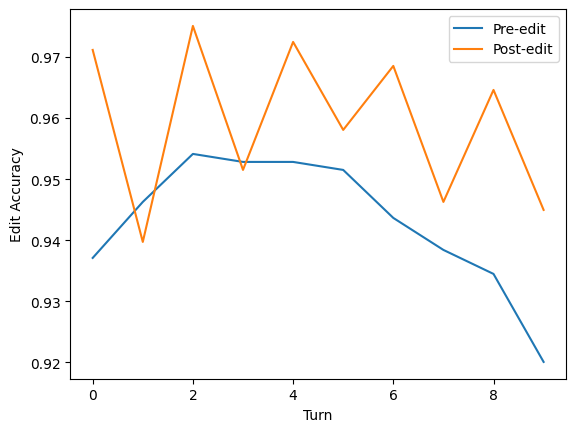

In [12]:
with open('../tmp/places_country_ROME_meta_llama_3.1_8b_instruct.json', 'r') as file:
    metrics = json.load(file)
plot_multi_turn(metrics)

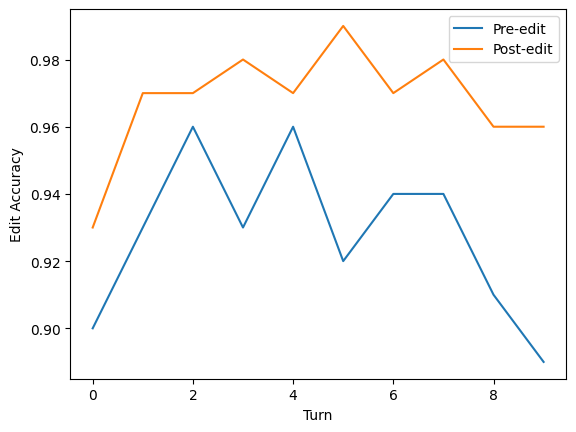

In [3]:
with open('../results/meta_llama_3.1_8b_instruct/places_country_ROME.json', 'r') as file:
    metrics = json.load(file)
plot_multi_turn(metrics)

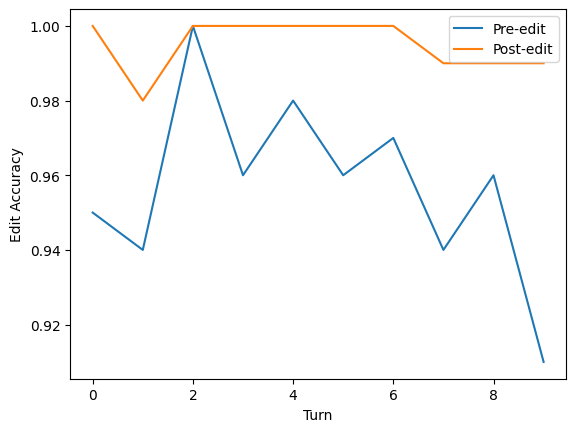

In [6]:
with open('../results/meta_llama_3.1_8b_instruct/technology_software_ROME.json', 'r') as file:
    metrics = json.load(file)
plot_multi_turn(metrics)

## Table Summary

In [56]:
df, df_multi_hop = summarize_results("../results/meta_llama_3_8b_instruct")
df.sort_values(by=['topic', 'edit_method'])

,domain,topic,edit_method,efficacy_pre,efficacy_post,rephrase_pre,rephrase_post,yes_pre,yes_post,no_pre,no_post,mc_pre,mc_post,reversed_pre,reversed_post,locality_post
28,entertainment,anime,FT-L,0.0,42.0,7.0,48.0,63.0,30.0,22.0,10.0,24.0,25.0,2.0,0.0,4.0
29,entertainment,anime,FT-M,0.0,72.0,7.0,71.0,63.0,50.0,22.0,16.0,24.0,24.0,2.0,0.0,39.0
30,entertainment,anime,GRACE,1.0,100.0,3.0,3.0,63.0,63.0,22.0,22.0,24.0,24.0,2.0,2.0,100.0
31,entertainment,anime,ICL,0.0,97.0,7.0,97.0,63.0,98.0,22.0,83.0,24.0,94.0,2.0,63.0,46.0
32,entertainment,anime,LoRA,0.0,87.0,7.0,89.0,63.0,78.0,22.0,11.0,24.0,57.0,2.0,5.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,human,writer,GRACE,0.0,100.0,2.0,1.0,66.0,66.0,22.0,22.0,40.0,40.0,7.0,7.0,100.0
136,human,writer,ICL,0.0,96.0,4.0,97.0,66.0,89.0,22.0,76.0,40.0,92.0,7.0,84.0,60.0
137,human,writer,LoRA,0.0,90.0,4.0,84.0,66.0,69.0,22.0,30.0,40.0,64.0,7.0,3.0,31.0
138,human,writer,MEMIT,0.0,78.0,4.0,75.0,66.0,72.0,22.0,38.0,40.0,72.0,7.0,1.0,18.0


In [ ]:
df.sort_values(by=['topic', 'edit_method'])

,topic,edit_method,efficacy_pre,efficacy_post,rephrase_pre,rephrase_post,yes_pre,yes_post,no_pre,no_post,mc_pre,mc_post,reversed_pre,reversed_post,locality_post
24,business brand,FT-L,0.0,23.0,13.0,21.0,53.0,7.0,30.0,6.0,56.0,34.0,3.0,0.0,0.0
2,business brand,FT-M,0.0,48.0,13.0,39.0,53.0,53.0,30.0,29.0,56.0,56.0,3.0,4.0,86.0
16,business brand,GRACE,0.0,99.0,0.0,0.0,53.0,53.0,30.0,30.0,56.0,56.0,3.0,3.0,100.0
40,business brand,ICL,0.0,98.0,13.0,98.0,53.0,97.0,30.0,65.0,56.0,88.0,3.0,71.0,49.0
44,business brand,LoRA,0.0,87.0,13.0,85.0,53.0,14.0,30.0,9.0,56.0,42.0,3.0,7.0,5.0
15,business brand,MEMIT,0.0,66.0,13.0,59.0,53.0,71.0,30.0,29.0,56.0,61.0,3.0,2.0,21.0
26,business brand,ROME,0.0,69.0,13.0,65.0,53.0,76.0,30.0,35.0,56.0,72.0,3.0,2.0,27.0
7,business corporation,FT-L,0.0,34.0,5.0,37.0,47.0,6.0,28.0,6.0,52.0,38.0,5.0,2.0,2.0
34,business corporation,FT-M,0.0,35.0,5.0,29.0,47.0,47.0,28.0,29.0,52.0,52.0,5.0,4.0,87.0
22,business corporation,ICL,0.0,97.0,5.0,99.0,47.0,97.0,28.0,72.0,52.0,90.0,5.0,81.0,50.0


In [57]:
df[df['edit_method']=='GRACE']

,domain,topic,edit_method,efficacy_pre,efficacy_post,rephrase_pre,rephrase_post,yes_pre,yes_post,no_pre,no_post,mc_pre,mc_post,reversed_pre,reversed_post,locality_post
2,art,sculpture,GRACE,3.00,99.00,4.00,3.00,61.00,61.00,26.00,26.00,34.00,34.00,6.00,6.00,100.0
9,business,brand,GRACE,2.00,100.00,2.00,3.00,62.00,62.00,22.00,22.00,27.00,27.00,14.00,14.00,100.0
16,business,corporation,GRACE,0.00,98.89,0.00,0.00,62.22,62.22,14.44,14.44,27.78,27.78,4.44,4.44,100.0
23,business,industry,GRACE,6.12,100.00,13.27,14.29,88.78,88.78,26.53,26.53,31.63,31.63,17.35,17.35,100.0
30,entertainment,anime,GRACE,1.00,100.00,3.00,3.00,63.00,63.00,22.00,22.00,24.00,24.00,2.00,2.00,100.0
37,entertainment,music genre,GRACE,8.00,99.00,5.00,6.00,80.00,80.00,23.00,23.00,38.00,38.00,19.00,19.00,100.0
44,entertainment,song,GRACE,0.00,97.00,0.00,0.00,73.00,73.00,24.00,24.00,33.00,33.00,5.00,5.00,100.0
51,event,film,GRACE,0.00,100.00,4.76,4.76,52.38,52.38,23.81,23.81,33.33,33.33,14.29,14.29,100.0
58,event,history,GRACE,5.71,97.14,2.86,2.86,71.43,71.43,15.71,15.71,34.29,34.29,32.86,32.86,100.0
65,event,sport,GRACE,2.70,100.00,2.70,2.70,72.97,72.97,32.43,32.43,45.95,45.95,21.62,21.62,100.0


In [60]:
df_tmp, _ = summarize_results("../tmp/all_grace/meta_llama_3_8b_instruct")
df_tmp

,domain,topic,edit_method,efficacy_pre,efficacy_post,rephrase_pre,rephrase_post,yes_pre,yes_post,no_pre,no_post,mc_pre,mc_post,reversed_pre,reversed_post,locality_post
0,event,sport,GRACE,0.0,100.0,16.22,2.7,72.97,16.22,32.43,18.92,45.95,5.41,21.62,5.41,59.46


## Efficacy

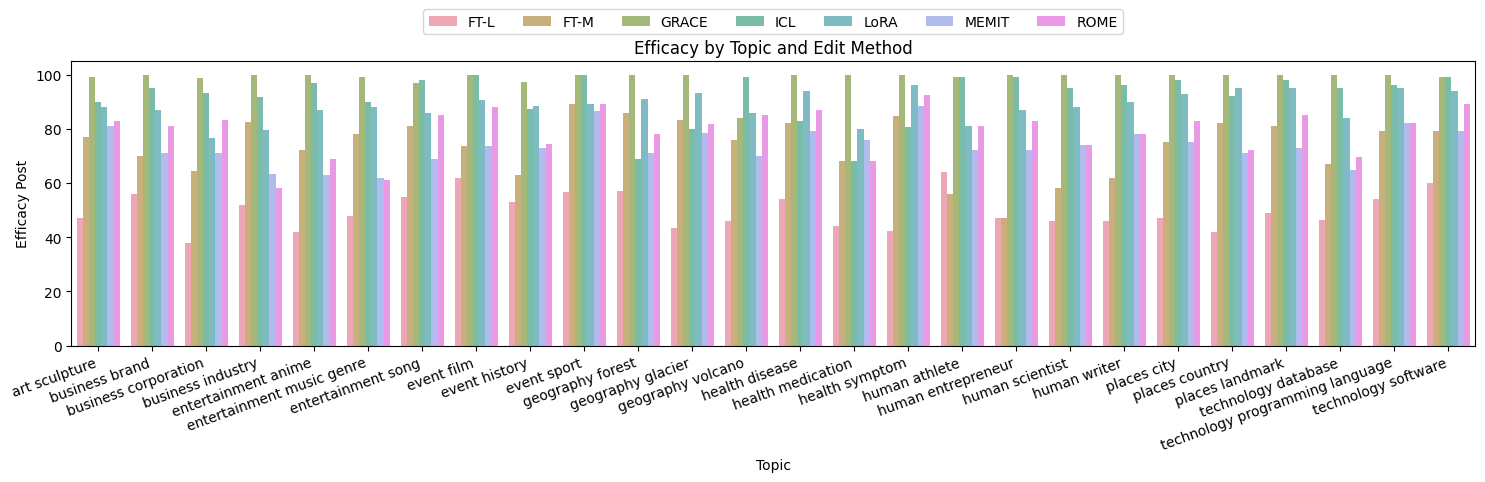

In [4]:
def plot_efficacy(df):
    # plot the efficacy by topic and edit method
    plt.figure(figsize=(15, 5))

    # Create a custom color palette
    colors = sns.color_palette("husl", n_colors=len(df.edit_method.unique()))
    ax = sns.barplot(x='topic', y='efficacy_post', hue='edit_method', data=df, palette=colors, alpha=0.7)

    plt.legend(bbox_to_anchor=(0.5, 1.07), loc='lower center', ncol=len(df.edit_method.unique())) # title='Edit Method', 
    plt.title('Efficacy by Topic and Edit Method')
    plt.xlabel('Topic')
    plt.ylabel('Efficacy Post')
    plt.xticks(rotation=20, ha='right')  # Rotate x-axis labels for better readability

    # Add value labels on top of each bar
    # for container in ax.containers:
    #     ax.bar_label(container, padding=3)  # , rotation=90

    plt.tight_layout()
    plt.show()

df, df_multi_hop = summarize_results("../results/meta_llama_3_8b_instruct")
# df.sort_values(by=['topic', 'edit_method'])
plot_efficacy(df)

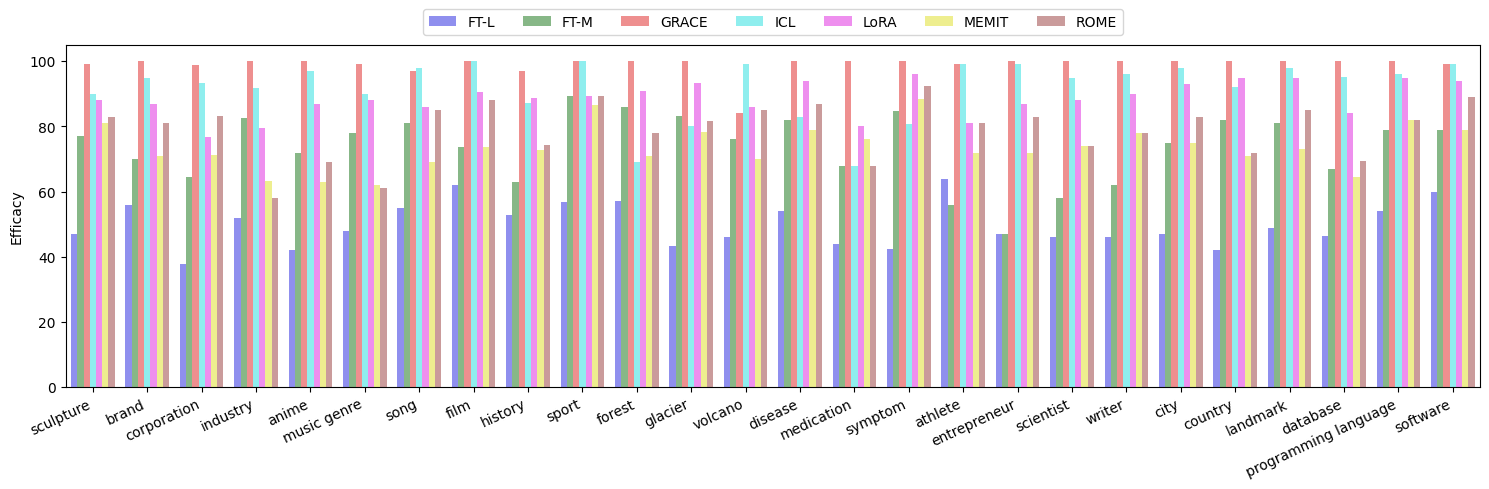

In [35]:
def plot_efficacy(df, name):
    plt.figure(figsize=(15, 5))
    colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'brown']
    ax = sns.barplot(x='topic', y='efficacy_post', hue='edit_method', data=df, palette=colors, alpha=0.5)
    plt.legend(bbox_to_anchor=(0.5, 1.01), loc='lower center', ncol=len(df.edit_method.unique()))  # title='Edit Method',
    # plt.title('Efficacy by Topic and Edit Method')
    plt.xlabel('')
    plt.ylabel('Efficacy')
    plt.xticks(rotation=25, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()
    plt.savefig(f'../results/figs/plot_efficacy_{name}.pdf')
    plt.show()

# df, df_multi_hop = summarize_results("../results/meta_llama_3_8b_instruct")
plot_efficacy(df, 'llama_3_8b')

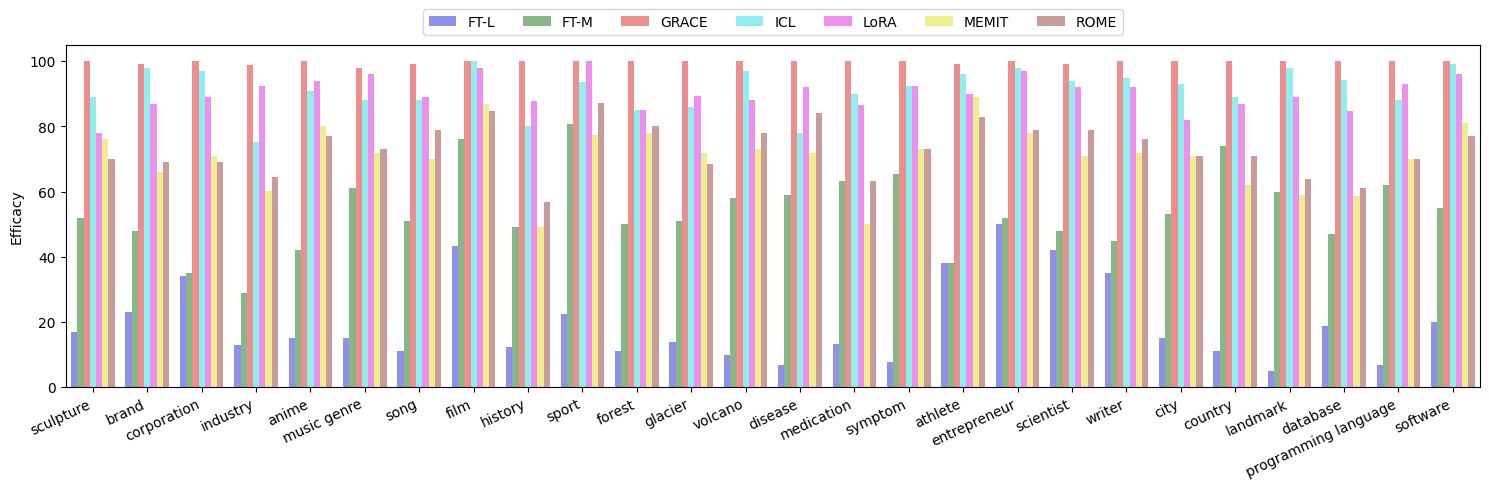

In [36]:
df, df_multi_hop = summarize_results("../results/mistral_7b_instruct_v0.3")
# df.sort_values(by=['topic', 'edit_method'])
plot_efficacy(df, 'mistral_7b')

/tmp/ipykernel_2970651/3636824228.py:7: UserWarning: The palette list has more values (14) than needed (7), which may not be intended.
  ax = sns.barplot(x='topic', y='efficacy_post', hue='edit_method', data=df, palette=colors, alpha=0.5)


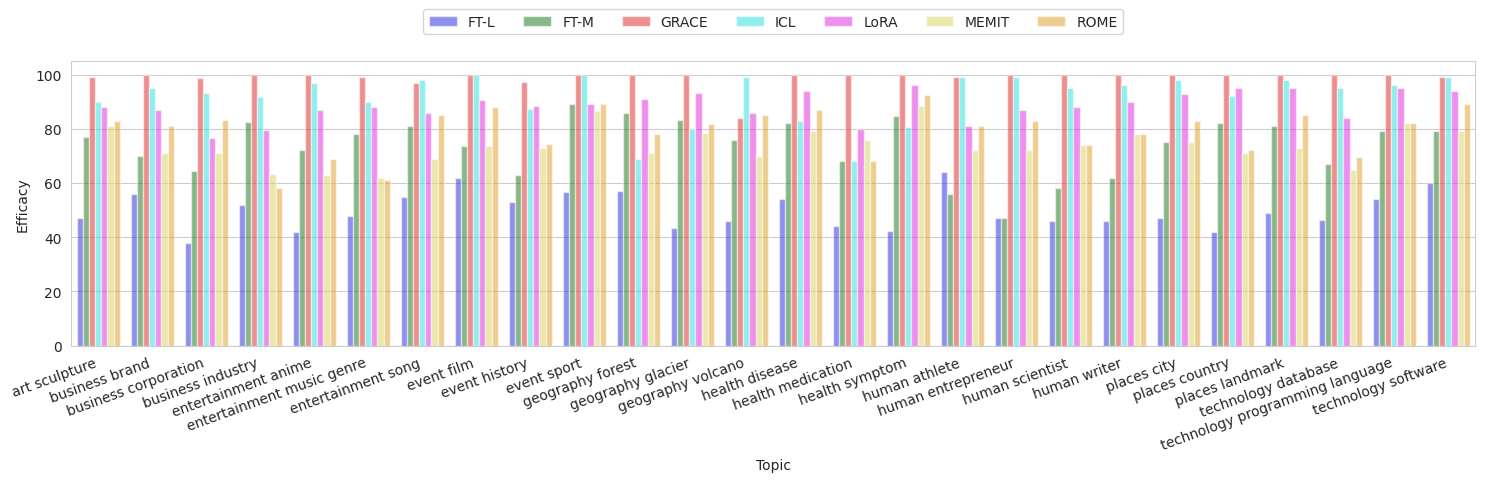

In [ ]:
def plot_efficacy(df):
    plt.figure(figsize=(15, 5))
    # colors = sns.color_palette("husl", n_colors=len(df.edit_method.unique()))
    # colors = sns.color_palette("pastel", n_colors=len(df.edit_method.unique()))
    # colors = sns.color_palette("colorblind", n_colors=len(df.edit_method.unique()))
    colors = ['blue', 'green', 'red', 'cyan', 'magenta', '#F0E442', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'teal', 'navy']
    ax = sns.barplot(x='topic', y='efficacy_post', hue='edit_method', data=df, palette=colors, alpha=0.5)

    plt.legend(bbox_to_anchor=(0.5, 1.07), loc='lower center', ncol=len(df.edit_method.unique()))  # title='Edit Method',
    # plt.title('Efficacy by Topic and Edit Method')
    plt.xlabel('Topic')
    plt.ylabel('Efficacy')
    plt.xticks(rotation=20, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()
    plt.show()

plot_efficacy(df)  

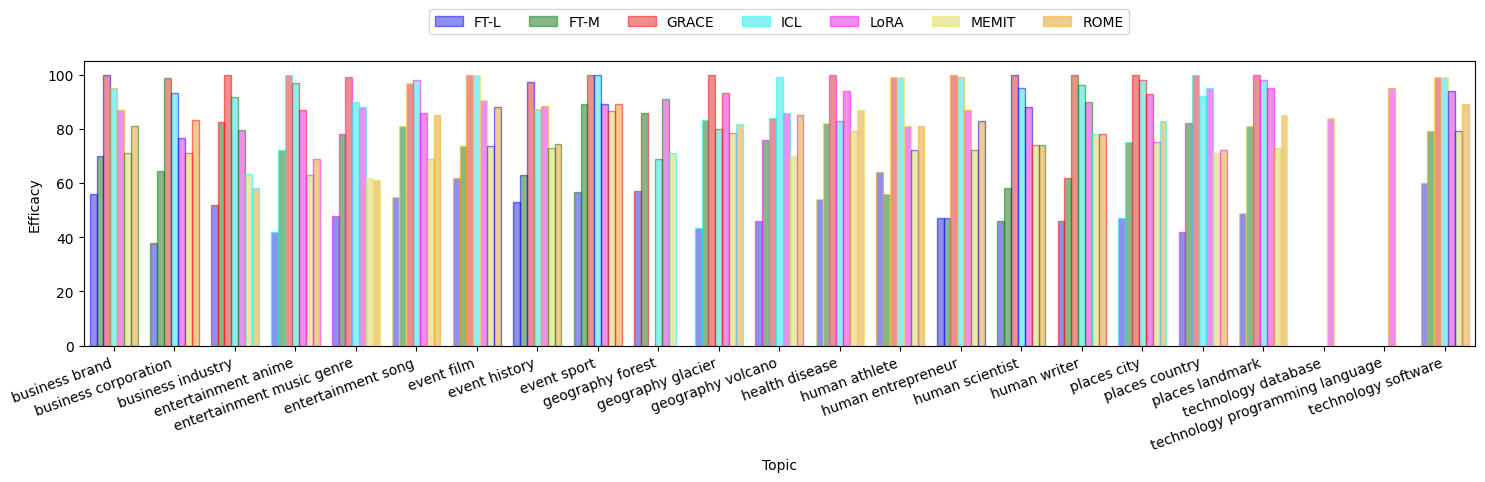

In [42]:
def plot_efficacy_mod(df):
    plt.figure(figsize=(15, 5))
    colors = ['blue', 'green', 'red', 'cyan', 'magenta', '#F0E442', 'orange']#, 'purple', 'brown', 'pink', 'gray', 'olive', 'teal', 'navy'
    
    # Ensure we have enough colors for all edit methods
    n_methods = len(df['edit_method'].unique())
    if n_methods > len(colors):
        colors = sns.color_palette("husl", n_colors=n_methods)
    
    ax = sns.barplot(x='topic', y='efficacy_post', hue='edit_method', data=df, palette=colors[:n_methods])
    
    # Adjust bar properties
    for i, bar in enumerate(ax.patches):
        bar.set_alpha(0.5)
        bar.set_edgecolor(colors[i % n_methods])
        bar.set_linewidth(1)

    plt.legend(bbox_to_anchor=(0.5, 1.07), loc='lower center', ncol=len(df['edit_method'].unique()))
    plt.xlabel('Topic')
    plt.ylabel('Efficacy')
    plt.xticks(rotation=20, ha='right')
    plt.tight_layout()
    plt.show()

plot_efficacy_mod(df)

In [9]:
# Check if all the multiple choice output are single letter
with open('../tmp/places_country_ROME_meta_llama_3.1_8b_instruct.json', 'r') as file:
    metrics = json.load(file)
for e in metrics:
    if len(e['post']['multiple_choice_questions']['multiple_choice_output']) != 1 or len(e['pre']['multiple_choice_questions']['multiple_choice_output']) != 1:
        print(e)

## Multi-hop

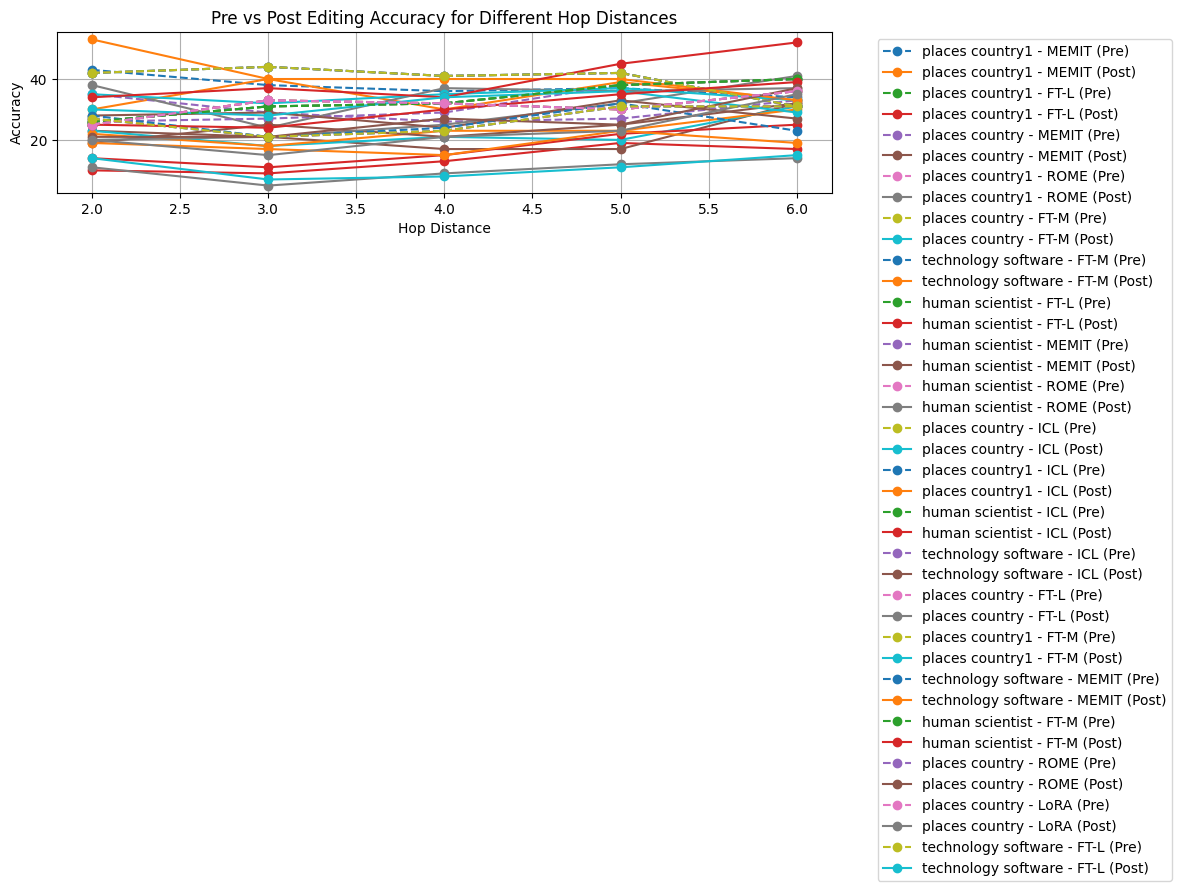

In [ ]:
# df, df_multi_hop = summarize_results("../results/meta_llama_3.1_8b_instruct")
plt.figure(figsize=(12, 6))

for index, row in df_multi_hop.iterrows():
    label = f"{row['topic']} - {row['edit_method']}"
    
    pre_values = [row[f'questions_{i}hop_pre'] for i in range(2, 7)]
    post_values = [row[f'questions_{i}hop_post'] for i in range(2, 7)]
    
    plt.plot(range(2, 7), pre_values, marker='o', linestyle='--', label=f"{label} (Pre)")
    plt.plot(range(2, 7), post_values, marker='o', label=f"{label} (Post)")

plt.xlabel('Hop Distance')
plt.ylabel('Accuracy')
plt.title('Pre vs Post Editing Accuracy for Different Hop Distances')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()

In [44]:
df_domain.domain.nunique(), df_domain.columns

(9,
 Index(['domain', 'edit_method', 'questions_2hop_pre', 'questions_2hop_post',
        'questions_3hop_pre', 'questions_3hop_post', 'questions_4hop_pre',
        'questions_4hop_post', 'questions_5hop_pre', 'questions_5hop_post',
        'questions_6hop_pre', 'questions_6hop_post'],
       dtype='object'))

plot the df_domain to line charts with 3 by 3 subplot, each for one domain, each subplot shows 2 (pre- and post- score) * 7 edit_method = 14 lines.
since all the pre- scores with dashed lines are overlapping, using only 1 color for the pre- socre for 7 methods. Also only show 1 legend in the center top part because they are all the same for 9 subplots

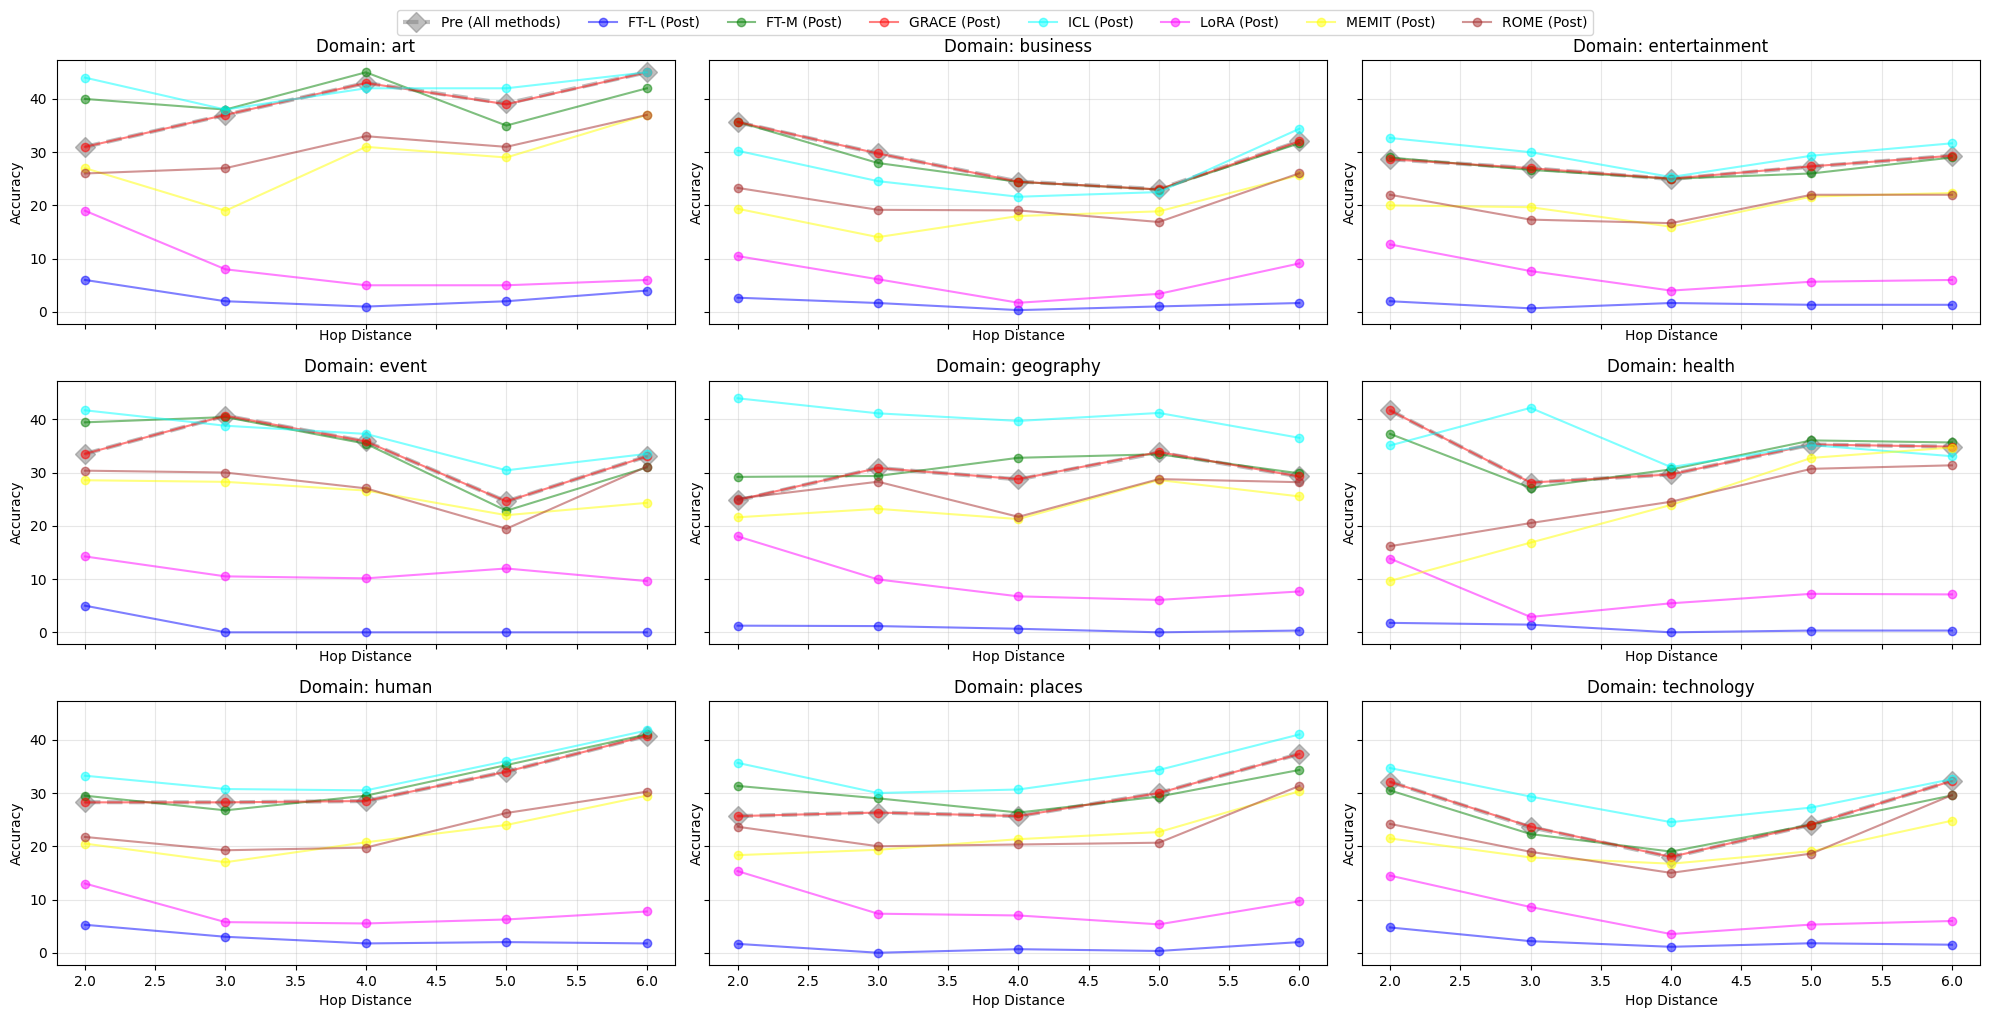

In [54]:
df_domain = df_multi_hop.groupby(['domain', 'edit_method']).mean().reset_index()

# Set up the subplot grid
fig, axes = plt.subplots(3, 3, figsize=(20, 10), sharex=True, sharey=True)
# fig.suptitle('Pre vs Post Editing Accuracy for Different Hop Distances by Domain', fontsize=16)

# Get unique domains and edit methods
domains = df_domain['domain'].unique()
edit_methods = df_domain['edit_method'].unique()

# Color palette for edit methods (post-editing)
# colors = sns.color_palette("husl", n_colors=len(edit_methods))
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'brown']

# Create a single legend for the entire figure
lines = []
labels = []

for i, domain in enumerate(domains):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    domain_data = df_domain[df_domain['domain'] == domain]
    
    # Set up the grid to be behind the plot and faded
    ax.grid(True, zorder=0, alpha=0.3)
    
    # Plot pre-editing scores (all methods in one color)
    pre_values = [domain_data[f'questions_{k}hop_pre'].mean() for k in range(2, 7)]
    pre_line, = ax.plot(range(2, 7), pre_values, marker='D', linestyle='--', color='gray', label='Pre (All methods)', linewidth=3, alpha=0.5, zorder=2, markersize=10)
    
    if i == 0:
        lines.append(pre_line)
        labels.append('Pre (All methods)')
    
    for j, method in enumerate(edit_methods):
        method_data = domain_data[domain_data['edit_method'] == method]
        post_values = [method_data[f'questions_{k}hop_post'].values[0] for k in range(2, 7)]
        post_line, = ax.plot(range(2, 7), post_values, marker='o', color=colors[j], label=f"{method} (Post)", zorder=2, alpha=0.5)
        
        if i == 0:
            lines.append(post_line)
            labels.append(f"{method} (Post)")
    
    ax.set_xlabel('Hop Distance')
    ax.set_ylabel('Accuracy')
    ax.set_title(f'Domain: {domain}')
    
    # Set the plot area on top of the grid
    ax.set_axisbelow(True)

# Remove any unused subplots
for i in range(len(domains), 9):
    row = i // 3
    col = i % 3
    fig.delaxes(axes[row, col])

# Add a single legend to the center top of the figure
fig.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, 1.02), ncol=8)

plt.tight_layout()
plt.show()

In [ ]:
# df, df_multi_hop = summarize_results("../results/meta_llama_3_8b_instruct")
plt.figure(figsize=(12, 6))

for index, row in df_multi_hop.iterrows():
    label = f"{row['topic']} - {row['edit_method']}"
    
    pre_values = [row[f'questions_{i}hop_pre'] for i in range(2, 7)]
    post_values = [row[f'questions_{i}hop_post'] for i in range(2, 7)]
    
    plt.plot(range(2, 7), pre_values, marker='o', linestyle='--', label=f"{label} (Pre)")
    plt.plot(range(2, 7), post_values, marker='o', label=f"{label} (Post)")

plt.xlabel('Hop Distance')
plt.ylabel('Accuracy')
plt.title('Pre vs Post Editing Accuracy for Different Hop Distances')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()

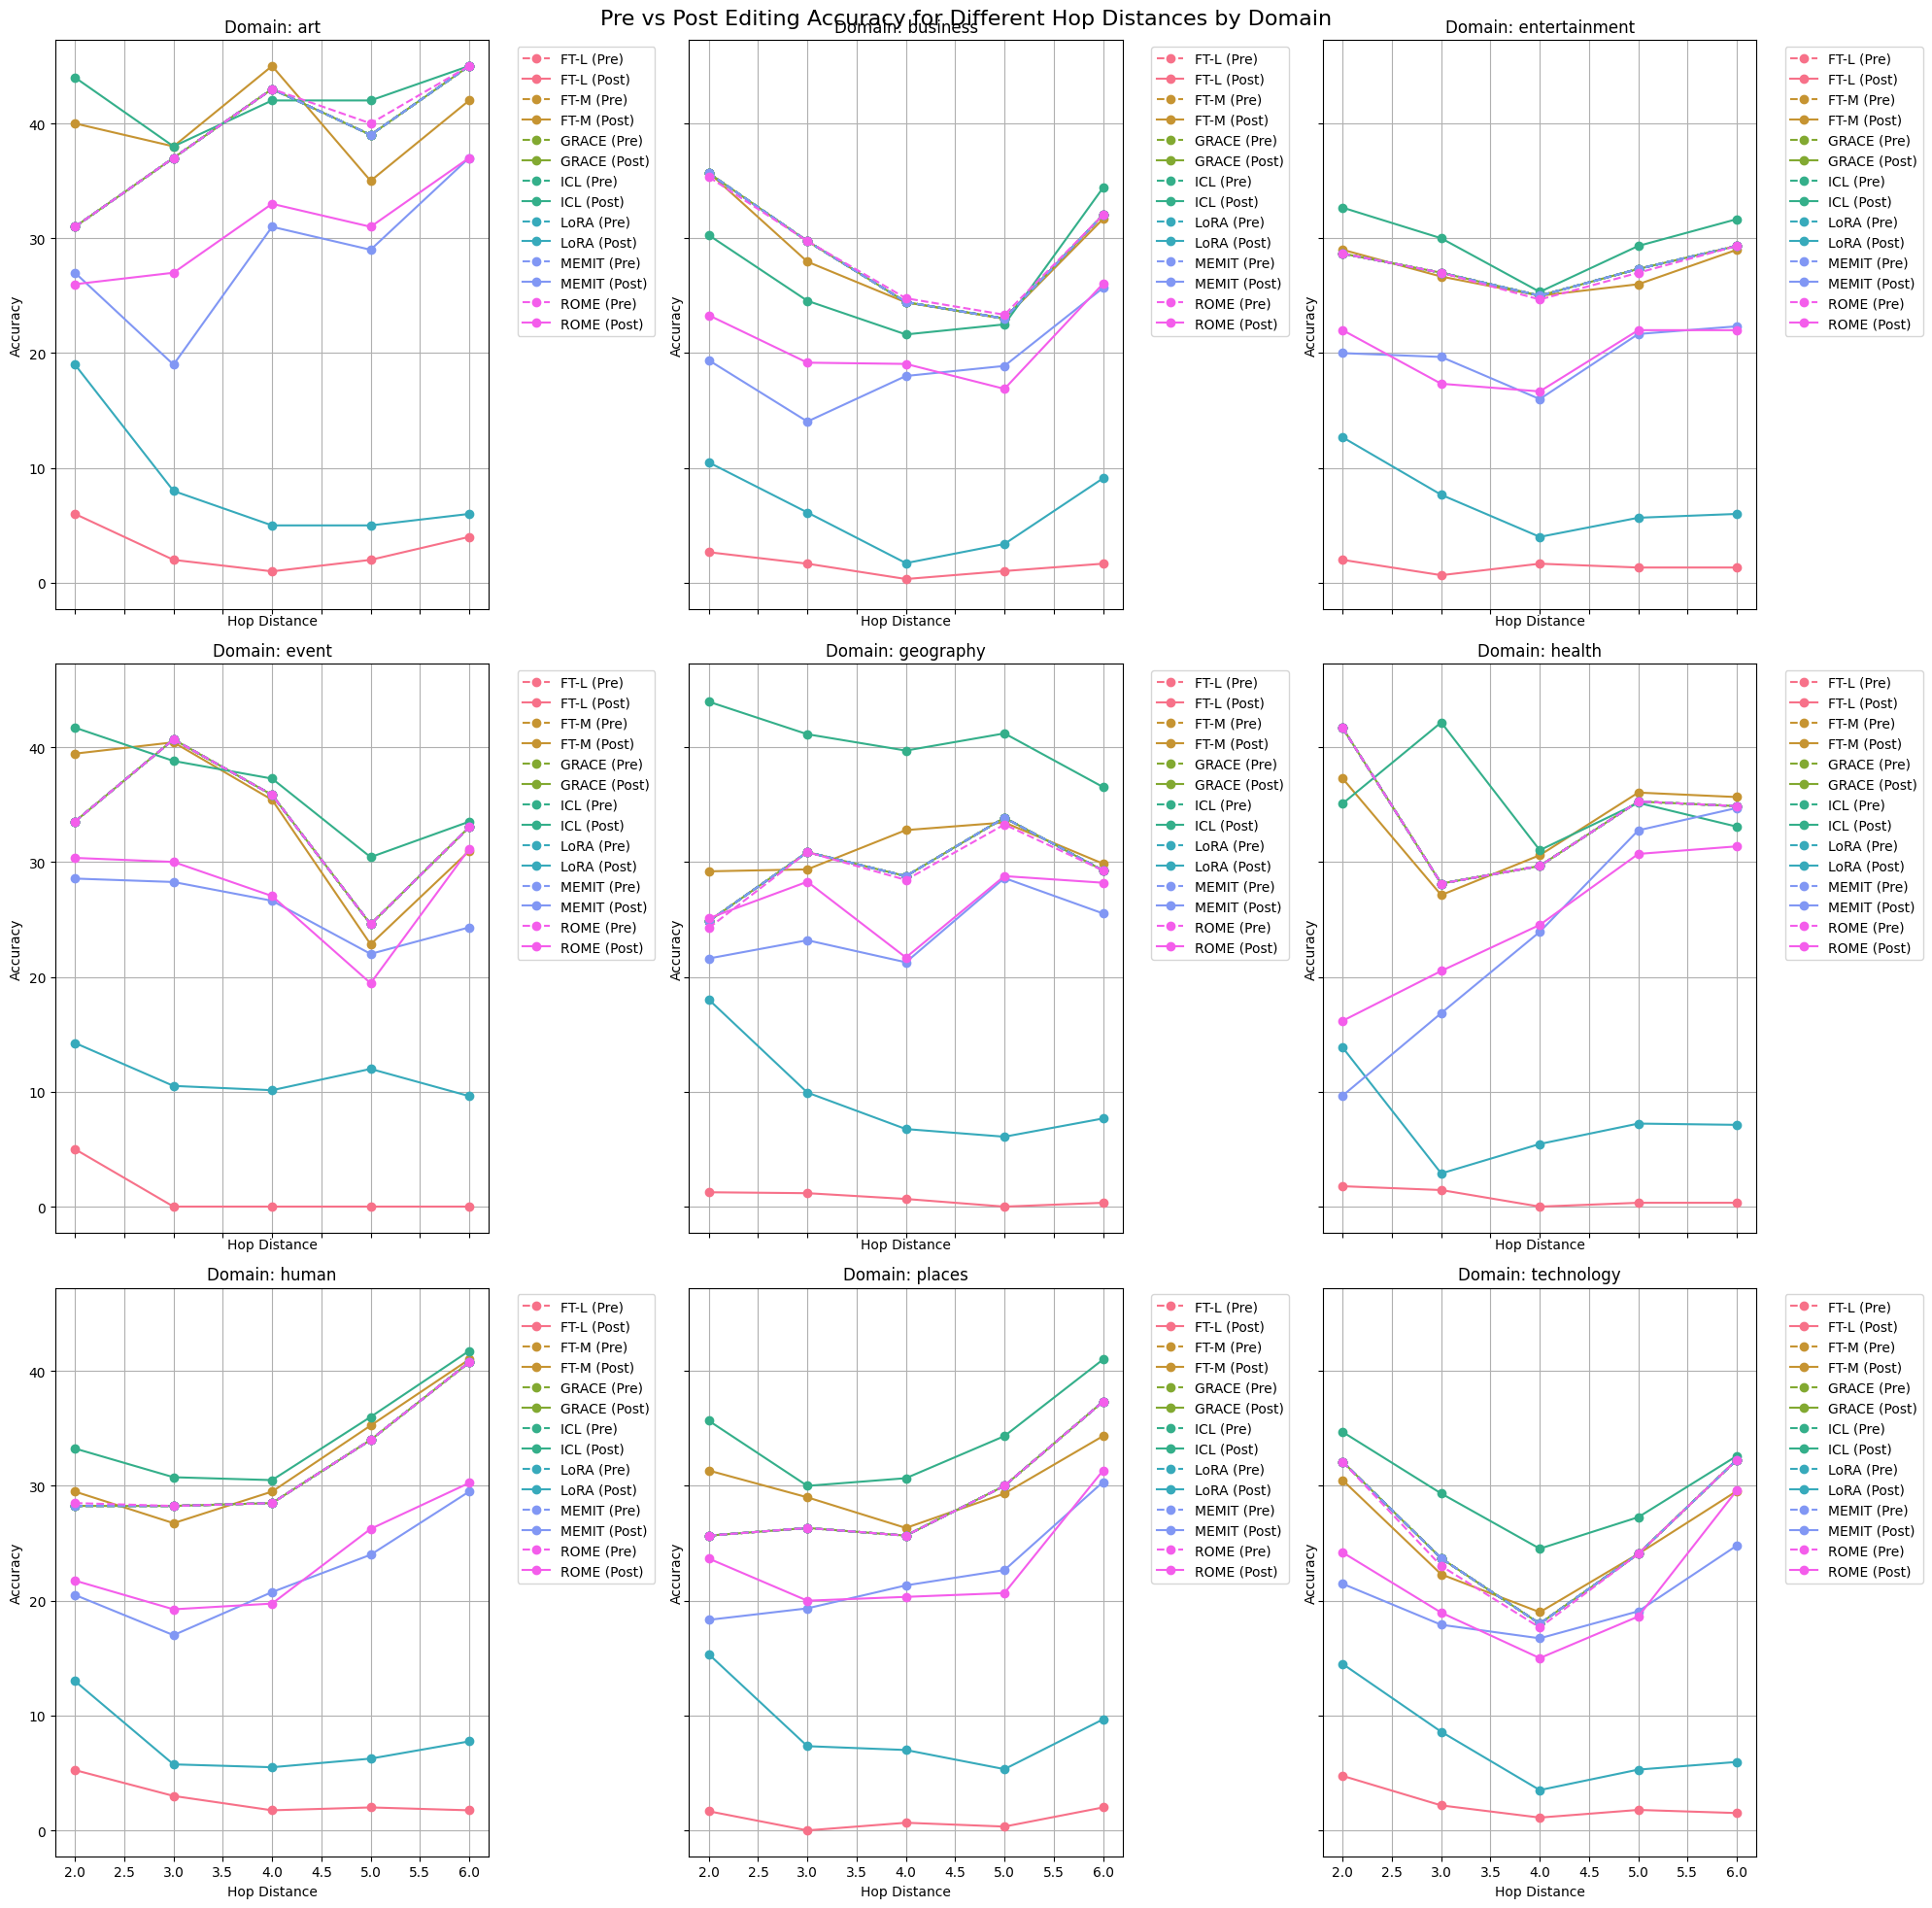

In [ ]:
# df, df_multi_hop = summarize_results("../results/meta_llama_3_8b_instruct")
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Group by domain and calculate mean for each hop
df_domain = df_multi_hop.groupby(['domain', 'edit_method']).mean().reset_index()

# Get unique domains and edit methods
domains = df_domain['domain'].unique()
edit_methods = df_domain['edit_method'].unique()

# Set up the subplot grid
n_rows, n_cols = 3, 3
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 20), sharex=True, sharey=True)
fig.suptitle('Pre vs Post Editing Accuracy for Different Hop Distances by Domain', fontsize=16)

# Color palette for edit methods
colors = sns.color_palette("husl", n_colors=len(edit_methods))

for i, domain in enumerate(domains):
    row = i // n_cols
    col = i % n_cols
    ax = axes[row, col]
    domain_data = df_domain[df_domain['domain'] == domain]
    
    for j, method in enumerate(edit_methods):
        method_data = domain_data[domain_data['edit_method'] == method]
        
        pre_values = [method_data[f'questions_{k}hop_pre'].values[0] for k in range(2, 7)]
        post_values = [method_data[f'questions_{k}hop_post'].values[0] for k in range(2, 7)]
        
        ax.plot(range(2, 7), pre_values, marker='o', linestyle='--', color=colors[j], label=f"{method} (Pre)")
        ax.plot(range(2, 7), post_values, marker='o', color=colors[j], label=f"{method} (Post)")
    
    ax.set_xlabel('Hop Distance')
    ax.set_ylabel('Accuracy')
    ax.set_title(f'Domain: {domain}')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.grid(True)

# Remove any unused subplots
for i in range(len(domains), n_rows * n_cols):
    row = i // n_cols
    col = i % n_cols
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()

## Misc

In [ ]:
def summarize_results_simple(json_folder, std_flag=False):
    metrics_ls, metrics_ls_multi_hop = [], []

    for filename in os.listdir(json_folder):
        if filename.endswith('GRACE.json') and 'multi_turn' not in filename:
            filepath = os.path.join(json_folder, filename)
            with open(filepath, 'r') as file:
                metrics = json.load(file)
                topic, edit_method = ' '.join(filename.split('_')[:2]), filename.split('_')[2:][0].replace('.json', '')
                results = {
                    "topic": topic,
                    "edit_method": edit_method,
                    "efficacy_pre": get_avg_std([e['pre']['edit_acc'][0] for e in metrics]),
                    "efficacy_post": get_avg_std([e['post']['edit_acc'][0] for e in metrics]),
                }
                metrics_ls.append(results)
    df = pd.DataFrame(metrics_ls)
    return df
df = summarize_results_simple('../tmp')
df

In [ ]:
with open('../tmp/human_scientist_GRACE.json', 'r') as file:
    metrics = json.load(file)
    results_ls = []
    for e in metrics:
        results = {
            "efficacy_post": e['post']['edit_acc'][0],
            "pre_output": e['pre']['edit_output'][0],
            "post_output": e['post']['edit_output'][0],
            "ground_truth": e['requested_edit']['target_new'],
        }
        results_ls.append(results)
tmp = pd.DataFrame(results_ls)
tmp

In [62]:
tmp[tmp['pre_output'] != tmp['post_output']].shape

(0, 4)

## Dumbbell plot

In [ ]:
df[df['edit_method']=='GRACE']

,topic,edit_method,efficacy_pre,efficacy_post,rephrase_pre,rephrase_post,yes_pre,yes_post,no_pre,no_post,mc_pre,mc_post,reversed_pre,reversed_post,locality_post
2,art sculpture,GRACE,3.00,99.00,4.00,3.00,61.00,61.00,26.00,26.00,34.00,34.00,6.00,6.00,100.0
9,business brand,GRACE,2.00,100.00,2.00,3.00,62.00,62.00,22.00,22.00,27.00,27.00,14.00,14.00,100.0
16,business corporation,GRACE,0.00,98.89,0.00,0.00,62.22,62.22,14.44,14.44,27.78,27.78,4.44,4.44,100.0
23,business industry,GRACE,6.12,100.00,13.27,14.29,88.78,88.78,26.53,26.53,31.63,31.63,17.35,17.35,100.0
30,entertainment anime,GRACE,1.00,100.00,3.00,3.00,63.00,63.00,22.00,22.00,24.00,24.00,2.00,2.00,100.0
37,entertainment music genre,GRACE,8.00,99.00,5.00,6.00,80.00,80.00,23.00,23.00,38.00,38.00,19.00,19.00,100.0
44,entertainment song,GRACE,0.00,97.00,0.00,0.00,73.00,73.00,24.00,24.00,33.00,33.00,5.00,5.00,100.0
51,event film,GRACE,0.00,100.00,4.76,4.76,52.38,52.38,23.81,23.81,33.33,33.33,14.29,14.29,100.0
58,event history,GRACE,5.71,97.14,2.86,2.86,71.43,71.43,15.71,15.71,34.29,34.29,32.86,32.86,100.0
65,event sport,GRACE,2.70,100.00,2.70,2.70,72.97,72.97,32.43,32.43,45.95,45.95,21.62,21.62,100.0


In [46]:
df.columns

Index(['topic', 'edit_method', 'efficacy_pre', 'efficacy_post', 'rephrase_pre',
       'rephrase_post', 'yes_pre', 'yes_post', 'no_pre', 'no_post', 'mc_pre',
       'mc_post', 'reversed_pre', 'reversed_post', 'locality_post'],
      dtype='object')

Draw a dumbbell dot plot:
Across the x-axis there are 6 blocks: 'efficacy', 'rephrase',  'yes', 'no', 'mc', 'reversed'. Within each block use 7 colors for 7 edit methods.
y-axis show each metric value in a vertical dumbbell dot plot, which one dot for pre- and one for post- metric.
the input dataframe has following columns: 'topic', 'edit_method', 'efficacy_pre', 'efficacy_post', 'rephrase_pre', 'rephrase_post', 'yes_pre', 'yes_post', 'no_pre', 'no_post', 'mc_pre', 'mc_post', 'reversed_pre', 'reversed_post'

In [48]:
df.head()

,topic,edit_method,efficacy_pre,efficacy_post,rephrase_pre,rephrase_post,yes_pre,yes_post,no_pre,no_post,mc_pre,mc_post,reversed_pre,reversed_post,locality_post
0,business brand,FT-L,0.0,56.0,12.0,52.0,62.0,51.0,22.0,14.0,27.0,28.0,14.0,5.0,15.0
1,business brand,FT-M,0.0,70.0,12.0,66.0,62.0,63.0,22.0,19.0,27.0,27.0,14.0,6.0,48.0
2,business brand,GRACE,2.0,100.0,2.0,3.0,62.0,62.0,22.0,22.0,27.0,27.0,14.0,14.0,100.0
3,business brand,ICL,0.0,95.0,12.0,91.0,62.0,89.0,22.0,67.0,27.0,88.0,14.0,73.0,58.0
4,business brand,LoRA,0.0,87.0,12.0,85.0,62.0,68.0,22.0,20.0,27.0,56.0,14.0,11.0,40.0


In [18]:
df

,topic,edit_method,efficacy_pre,efficacy_post,rephrase_pre,rephrase_post,yes_pre,yes_post,no_pre,no_post,mc_pre,mc_post,reversed_pre,reversed_post,locality_post
0,art sculpture,FT-L,0.0,47.0,12.0,59.0,61.0,46.0,26.0,10.0,34.0,33.0,6.0,0.0,16.0
1,art sculpture,FT-M,0.0,77.0,12.0,74.0,61.0,61.0,26.0,23.0,34.0,33.0,6.0,2.0,53.0
2,art sculpture,GRACE,3.0,99.0,4.0,3.0,61.0,61.0,26.0,26.0,34.0,34.0,6.0,6.0,100.0
3,art sculpture,ICL,0.0,90.0,12.0,87.0,61.0,87.0,26.0,65.0,34.0,81.0,6.0,72.0,50.0
4,art sculpture,LoRA,0.0,88.0,12.0,86.0,61.0,63.0,26.0,25.0,34.0,54.0,6.0,4.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,technology software,GRACE,2.0,99.0,3.0,4.0,77.0,77.0,23.0,23.0,31.0,31.0,5.0,5.0,100.0
178,technology software,ICL,0.0,99.0,4.0,96.0,77.0,95.0,23.0,74.0,31.0,93.0,5.0,80.0,63.0
179,technology software,LoRA,0.0,94.0,4.0,92.0,77.0,79.0,23.0,19.0,31.0,71.0,5.0,4.0,37.0
180,technology software,MEMIT,0.0,79.0,4.0,75.0,77.0,88.0,23.0,24.0,31.0,73.0,5.0,5.0,23.0


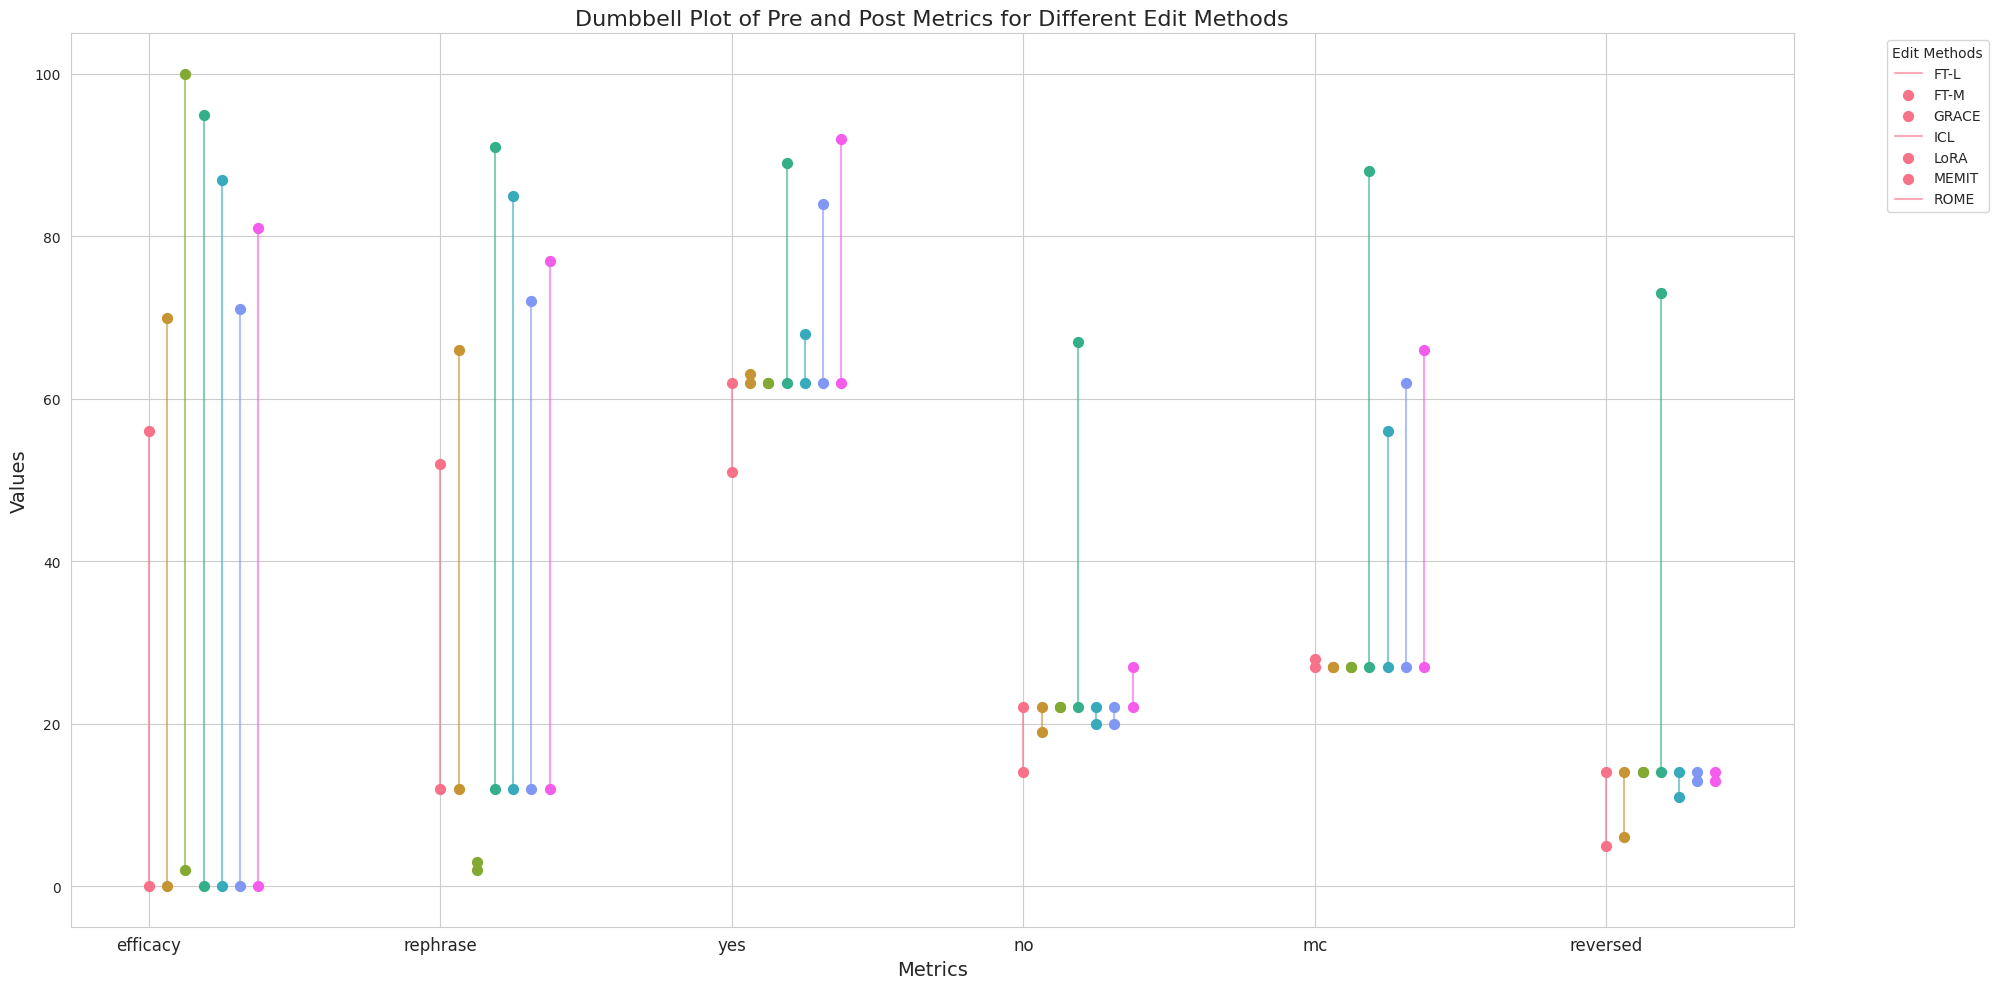

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_dumbbell(df):
    # Set up the plot
    plt.figure(figsize=(20, 10))
    sns.set_style("whitegrid")

    # Define colors for each edit method
    colors = sns.color_palette("husl", 7)
    edit_methods = df['edit_method'].unique()

    # Define the metrics and their positions on x-axis
    metrics = ['efficacy', 'rephrase', 'yes', 'no', 'mc', 'reversed']
    x_positions = [i * 4 for i in range(len(metrics))]

    # Plot dumbbell for each edit method and metric
    for i, method in enumerate(edit_methods):
        method_data = df[df['edit_method'] == method]
        
        for j, metric in enumerate(metrics):
            pre_col = f'{metric}_pre'
            post_col = f'{metric}_post'
            
            if pre_col in method_data.columns and post_col in method_data.columns:
                pre_value = method_data[pre_col].values[0]
                post_value = method_data[post_col].values[0]
                
                plt.plot([x_positions[j] + i * 0.25, x_positions[j] + i * 0.25], 
                        [pre_value, post_value], 
                        color=colors[i], alpha=0.6)
                plt.scatter(x_positions[j] + i * 0.25, pre_value, color=colors[i], s=50, zorder=10)
                plt.scatter(x_positions[j] + i * 0.25, post_value, color=colors[i], s=50, zorder=10)

    # Customize the plot
    plt.xlabel('Metrics', fontsize=14)
    plt.ylabel('Values', fontsize=14)
    plt.title('Dumbbell Plot of Pre and Post Metrics for Different Edit Methods', fontsize=16)

    # Set x-ticks and labels
    plt.xticks(x_positions, metrics, fontsize=12)

    # Add legend
    plt.legend(edit_methods, title='Edit Methods', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()

plot_dumbbell(df[df['topic'] == 'business brand'])

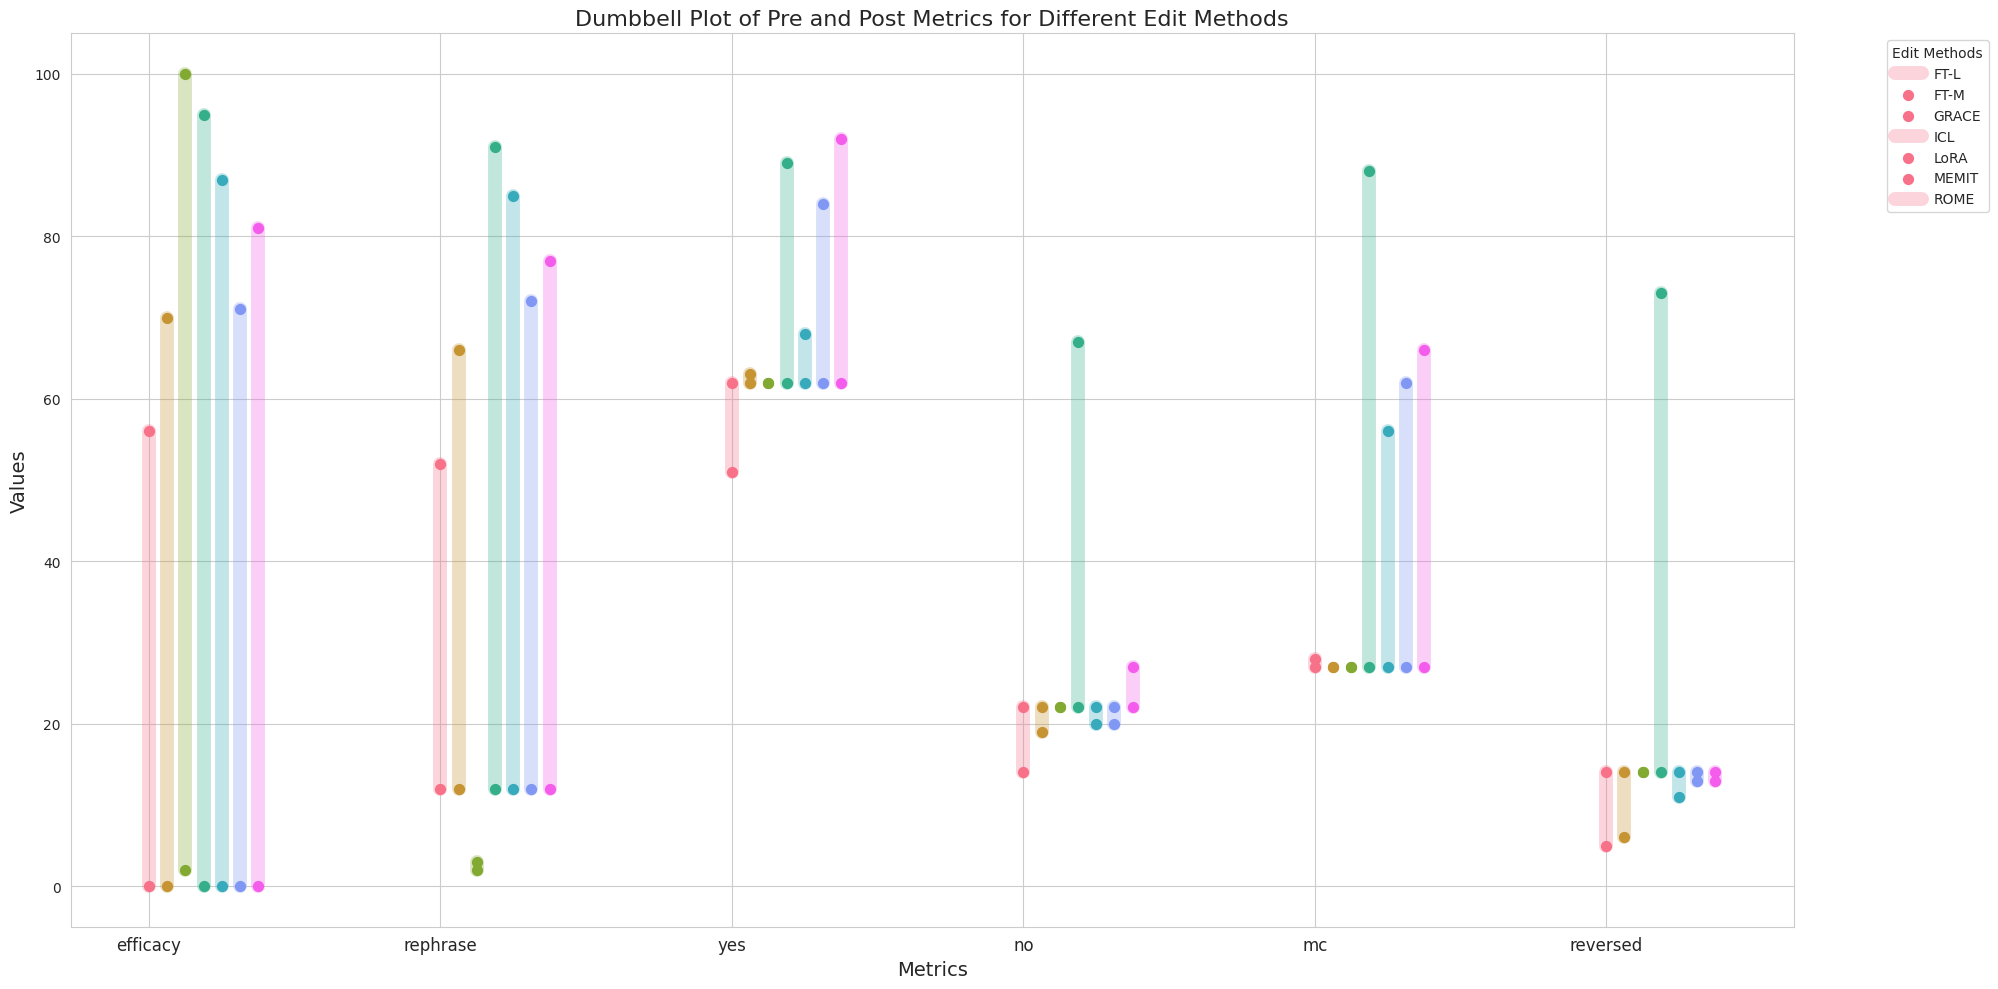

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_dumbbell(df):
    # Set up the plot
    plt.figure(figsize=(20, 10))
    sns.set_style("whitegrid")

    # Define colors for each edit method
    colors = sns.color_palette("husl", 7)
    edit_methods = df['edit_method'].unique()

    # Define the metrics and their positions on x-axis
    metrics = ['efficacy', 'rephrase', 'yes', 'no', 'mc', 'reversed']
    x_positions = [i * 4 for i in range(len(metrics))]

    # Plot dumbbell for each edit method and metric
    for i, method in enumerate(edit_methods):
        method_data = df[df['edit_method'] == method]
        
        for j, metric in enumerate(metrics):
            pre_col = f'{metric}_pre'
            post_col = f'{metric}_post'
            
            if pre_col in method_data.columns and post_col in method_data.columns:
                pre_value = method_data[pre_col].values[0]
                post_value = method_data[post_col].values[0]
                
                plt.plot([x_positions[j] + i * 0.25, x_positions[j] + i * 0.25], 
                        [pre_value, post_value], 
                        color=colors[i], alpha=0.3, linewidth=10)  # Increased linewidth and reduced alpha for transparency
                plt.scatter(x_positions[j] + i * 0.25, pre_value, color=colors[i], s=50, zorder=10)
                plt.scatter(x_positions[j] + i * 0.25, post_value, color=colors[i], s=50, zorder=10)

    # Customize the plot
    plt.xlabel('Metrics', fontsize=14)
    plt.ylabel('Values', fontsize=14)
    plt.title('Dumbbell Plot of Pre and Post Metrics for Different Edit Methods', fontsize=16)

    # Set x-ticks and labels
    plt.xticks(x_positions, metrics, fontsize=12)

    # Add legend
    plt.legend(edit_methods, title='Edit Methods', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()

plot_dumbbell(df[df['topic'] == 'business brand'])

In [ ]:
# change dot color to distinguish before and after

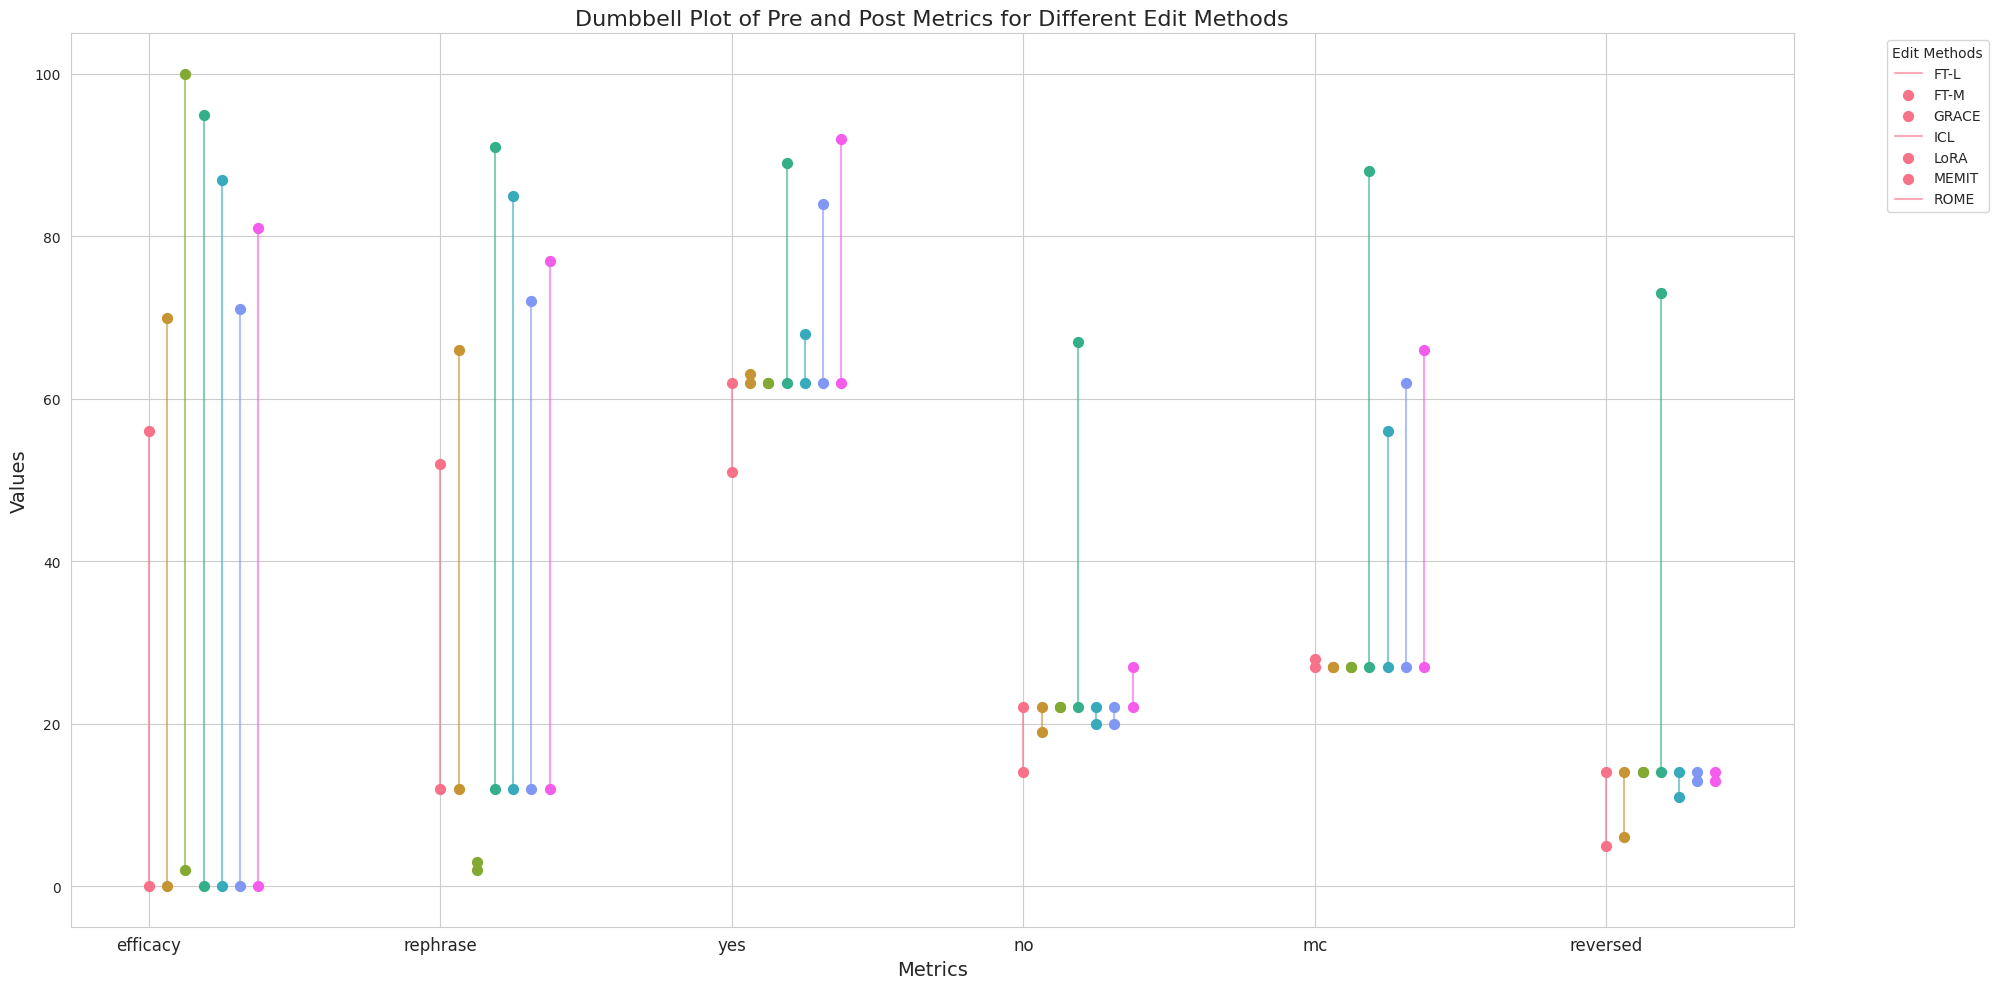

In [23]:
df, df_multi_hop = summarize_results("../tmp/all_grace/meta_llama_3_8b_instruct")
df

,topic,edit_method,efficacy_pre,efficacy_post,rephrase_pre,rephrase_post,yes_pre,yes_post,no_pre,no_post,mc_pre,mc_post,reversed_pre,reversed_post,locality_post
0,business corporation,GRACE,0.0,98.89,5.56,0.0,62.22,62.22,14.44,14.44,27.78,27.78,4.44,4.44,100.0
1,event sport,GRACE,0.0,100.00,16.22,2.7,72.97,72.97,32.43,32.43,45.95,45.95,21.62,21.62,100.0
2,geography forest,GRACE,0.0,100.00,32.00,2.0,86.00,86.00,26.00,26.00,53.00,53.00,30.00,30.00,100.0
3,places city,GRACE,0.0,100.00,12.00,2.0,39.00,39.00,48.00,48.00,36.00,36.00,10.00,10.00,100.0


In [ ]:
plot_dumbbell(df.mean())